In [2]:
import pandas as pd

df = pd.read_excel(
    "Hospital_General_Information_2016_2020.xlsx",
    engine=None
)

df.to_csv("Hospital_General_Information_2016_2020.csv", index=False)

In [3]:
md_df = df[df["State"] == "MD"]

In [4]:
md_df.shape
md_df.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Year
2147,210001,MERITUS MEDICAL CENTER,11116 MEDICAL CAMPUS ROAD,HAGERSTOWN,MD,21742,WASHINGTON,(240) 313-9500,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,2020
2148,210002,UNIVERSITY OF MARYLAND MEDICAL CENTER,22 SOUTH GREENE STREET,BALTIMORE,MD,21201,BALTIMORE CITY,(410) 328-8667,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,2020
2149,210003,UMD PRINCE GEORGE'S HOSPITAL CTR,3001 HOSPITAL DRIVE,CHEVERLY,MD,20785,PRINCE GEORGES,(301) 618-2000,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,2020
2150,210004,HOLY CROSS HOSPITAL,1500 FOREST GLEN ROAD,SILVER SPRING,MD,20910,MONTGOMERY,(301) 754-7000,Acute Care Hospitals,Voluntary non-profit - Church,...,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,2020
2151,210005,FREDERICK HEALTH HOSPITAL,400 WEST SEVENTH ST,FREDERICK,MD,21701,FREDERICK,(240) 566-3300,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,2020


In [5]:
md_df = md_df[md_df["Hospital Type"] == "Acute Care Hospitals"]

In [6]:
md_df["Hospital Type"].value_counts()

Acute Care Hospitals    235
Name: Hospital Type, dtype: int64

In [7]:
md_df = md_df[md_df["Hospital overall rating"].notna()]

In [8]:
md_df.shape

(235, 29)

In [9]:
md_df.shape
md_df["Hospital overall rating"].value_counts()

Not Available    101
3                 47
2                 29
4                 27
5                 17
1                 14
Name: Hospital overall rating, dtype: int64

In [10]:
md_df = md_df[md_df["Hospital overall rating"] != "Not Available"]
md_df["Hospital overall rating"].value_counts()

md_df["Hospital overall rating"] = pd.to_numeric(
    md_df["Hospital overall rating"], errors="coerce"
)

md_df.to_csv("md_hospitals_cleaned_2020.csv", index=False)

Descriptive statistics for Overall Hospital Star Ratings:
count    134.000000
mean       3.029851
std        1.162964
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Hospital overall rating, dtype: float64

Average star rating by hospital ownership:
Hospital Ownership
Voluntary non-profit - Church     2.777778
Voluntary non-profit - Private    2.970297
Proprietary                       3.333333
Voluntary non-profit - Other      3.380952
Name: Hospital overall rating, dtype: float64


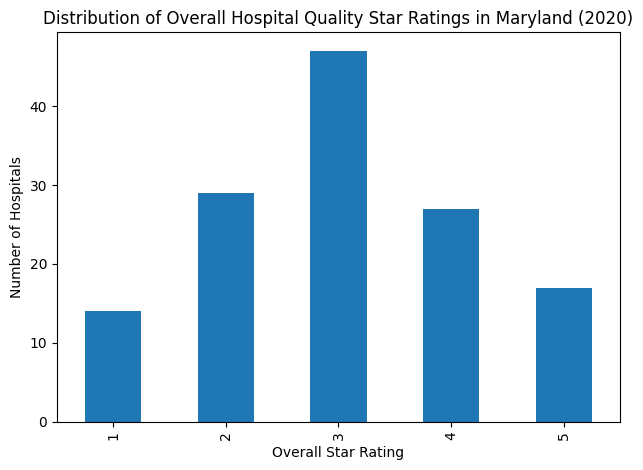

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

## cleaning + filtering for just MD hospitals!



# STEP 1: Remove hospitals without a reported star rating
md_df = md_df[md_df["Hospital overall rating"] != "Not Available"]
md_df["Hospital overall rating"] = pd.to_numeric(
    md_df["Hospital overall rating"], errors="coerce"
)

# Cleaned MD dataset ** new one to use
md_df.to_csv("md_hospitals_cleaned_2020.csv", index=False)

# descriptive statistics
print("Descriptive statistics for Overall Hospital Star Ratings:")
print(md_df["Hospital overall rating"].describe())

print("\nAverage star rating by hospital ownership:")
print(
    md_df.groupby("Hospital Ownership")["Hospital overall rating"]
    .mean()
    .sort_values()
)

# univariate plot
md_df["Hospital overall rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Overall Hospital Quality Star Ratings in Maryland (2020)")
plt.xlabel("Overall Star Rating")
plt.ylabel("Number of Hospitals")
plt.tight_layout()
plt.show()

In [12]:
md_df.groupby("County Name")["Hospital overall rating"].mean().sort_values()

County Name
ALLEGANY          1.666667
PRINCE GEORGES    1.866667
CECIL             2.333333
CARROLL           2.333333
CHARLES           2.666667
HARFORD           2.833333
BALTIMORE CITY    2.969697
KENT              3.000000
SOMERSET          3.000000
ST. MARYS         3.000000
ANNE ARUNDEL      3.166667
MONTGOMERY        3.277778
FREDERICK         3.333333
HOWARD            3.333333
TALBOT            3.333333
WASHINGTON        3.333333
BALTIMORE         3.583333
WORCESTER         3.666667
CALVERT           4.000000
GARRETT           4.333333
WICOMICO          5.000000
Name: Hospital overall rating, dtype: float64

In [13]:
## for sprint 3:


import pandas as pd
import statsmodels.api as sm

# model variables
model_df = md_df[
    ["Hospital overall rating", "Hospital Ownership", "Emergency Services", "County Name"]
].copy()

# emergency services to be simplified to binary
model_df["Emergency Services"] = model_df["Emergency Services"].map({"Yes": 1, "No": 0})

# more dummy/binary variables
model_df = pd.get_dummies(
    model_df,
    columns=["Hospital Ownership", "County Name"],
    drop_first=True
)

model_df.head()


,Hospital overall rating,Emergency Services,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private,County Name_ANNE ARUNDEL,County Name_BALTIMORE,County Name_BALTIMORE CITY,County Name_CALVERT,County Name_CARROLL,...,County Name_HOWARD,County Name_KENT,County Name_MONTGOMERY,County Name_PRINCE GEORGES,County Name_SOMERSET,County Name_ST. MARYS,County Name_TALBOT,County Name_WASHINGTON,County Name_WICOMICO,County Name_WORCESTER
2147,3,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2148,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2149,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2150,2,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2151,2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
import numpy as np
import statsmodels.api as sm

# dependent variable
y = model_df["Hospital overall rating"]

# Baseline model: intercept only
X_baseline = np.ones(len(y))

baseline_model = sm.OLS(y, X_baseline).fit()

print(baseline_model.summary())


                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                      -0.000
Model:                                 OLS   Adj. R-squared:                 -0.000
Method:                      Least Squares   F-statistic:                       nan
Date:                     Sun, 14 Dec 2025   Prob (F-statistic):                nan
Time:                             17:30:17   Log-Likelihood:                -209.87
No. Observations:                      134   AIC:                             421.7
Df Residuals:                          133   BIC:                             424.6
Df Model:                                0                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [15]:
X = model_df.drop(columns=["Hospital overall rating"])
X = sm.add_constant(X)

main_model = sm.OLS(y, X).fit()

print(main_model.summary())

                               OLS Regression Results                              
Dep. Variable:     Hospital overall rating   R-squared:                       0.404
Model:                                 OLS   Adj. R-squared:                  0.273
Method:                      Least Squares   F-statistic:                     3.084
Date:                     Sun, 14 Dec 2025   Prob (F-statistic):           3.49e-05
Time:                             17:30:18   Log-Likelihood:                -175.14
No. Observations:                      134   AIC:                             400.3
Df Residuals:                          109   BIC:                             472.7
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

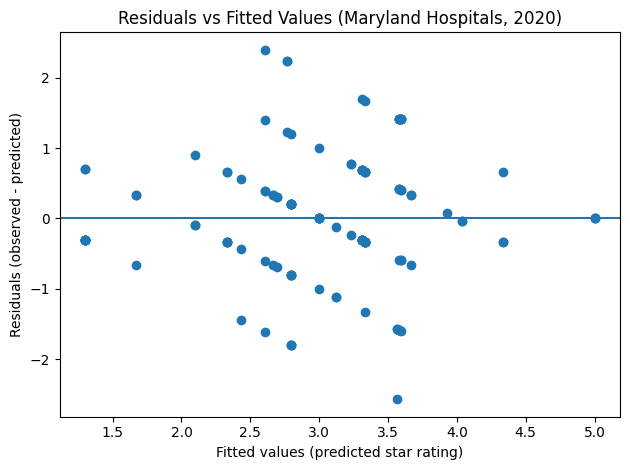

In [17]:
## MAKING THE VISUALS FOR THE SPRINT WRITE UP

import os
import matplotlib.pyplot as plt


# residuals and fitted values
fitted = main_model.fittedvalues
residuals = main_model.resid

# plot
plt.figure()
plt.scatter(fitted, residuals)
plt.axhline(0)
plt.title("Residuals vs Fitted Values (Maryland Hospitals, 2020)")
plt.xlabel("Fitted values (predicted star rating)")
plt.ylabel("Residuals (observed - predicted)")
plt.tight_layout()
plt.show()


In [18]:
## output tables for sprint 3 pdf

# regression table from statsmodels output
results_table = pd.DataFrame({
    "Variable": main_model.params.index,
    "Coefficient": main_model.params.values,
    "Std. Error": main_model.bse.values,
    "t": main_model.tvalues.values,
    "p-value": main_model.pvalues.values
})

# significance stars for readibility
def stars(p):
    if p < 0.001:
        return "***"
    if p < 0.01:
        return "**"
    if p < 0.05:
        return "*"
    if p < 0.1:
        return "•"
    return ""

results_table["Sig"] = results_table["p-value"].apply(stars)

# Rounding
results_table["Coefficient"] = results_table["Coefficient"].round(3)
results_table["Std. Error"] = results_table["Std. Error"].round(3)
results_table["t"] = results_table["t"].round(2)
results_table["p-value"] = results_table["p-value"].round(3)


# preview for top 15 
results_table.head(15)

,Variable,Coefficient,Std. Error,t,p-value,Sig
0,const,3.592,1.027,3.50,0.001,***
1,Emergency Services,0.107,0.548,0.20,0.846,
2,Hospital Ownership_Voluntary non-profit - Church,-2.222,0.737,-3.01,0.003,**
3,Hospital Ownership_Voluntary non-profit - Other,-1.237,0.677,-1.83,0.071,•
4,Hospital Ownership_Voluntary non-profit - Private,-2.032,0.644,-3.15,0.002,**
5,County Name_ANNE ARUNDEL,1.103,0.717,1.54,0.127,
6,County Name_BALTIMORE,1.917,0.640,3.00,0.003,**
7,County Name_BALTIMORE CITY,1.131,0.613,1.85,0.068,•
8,County Name_CALVERT,1.574,0.890,1.77,0.080,•
9,County Name_CARROLL,0.667,0.809,0.82,0.412,


In [23]:
model_comparison = pd.DataFrame({
    "Model": [
        "Baseline (mean-only)",
        "Main OLS (ownership + emergency services + county)"
    ],
    "Observations": [
        int(baseline_model.nobs),
        int(main_model.nobs)
    ],
    "R-squared": [
        round(baseline_model.rsquared, 3) if hasattr(baseline_model, "rsquared") else 0.000,
        round(main_model.rsquared, 3)
    ],
    "Adjusted R-squared": [
        round(baseline_model.rsquared_adj, 3) if hasattr(baseline_model, "rsquared_adj") else 0.000,
        round(main_model.rsquared_adj, 3)
    ]
})
model_comparison

,Model,Observations,R-squared,Adjusted R-squared
0,Baseline (mean-only),134,-0.000,-0.000
1,Main OLS (ownership + emergency services + cou...,134,0.404,0.273


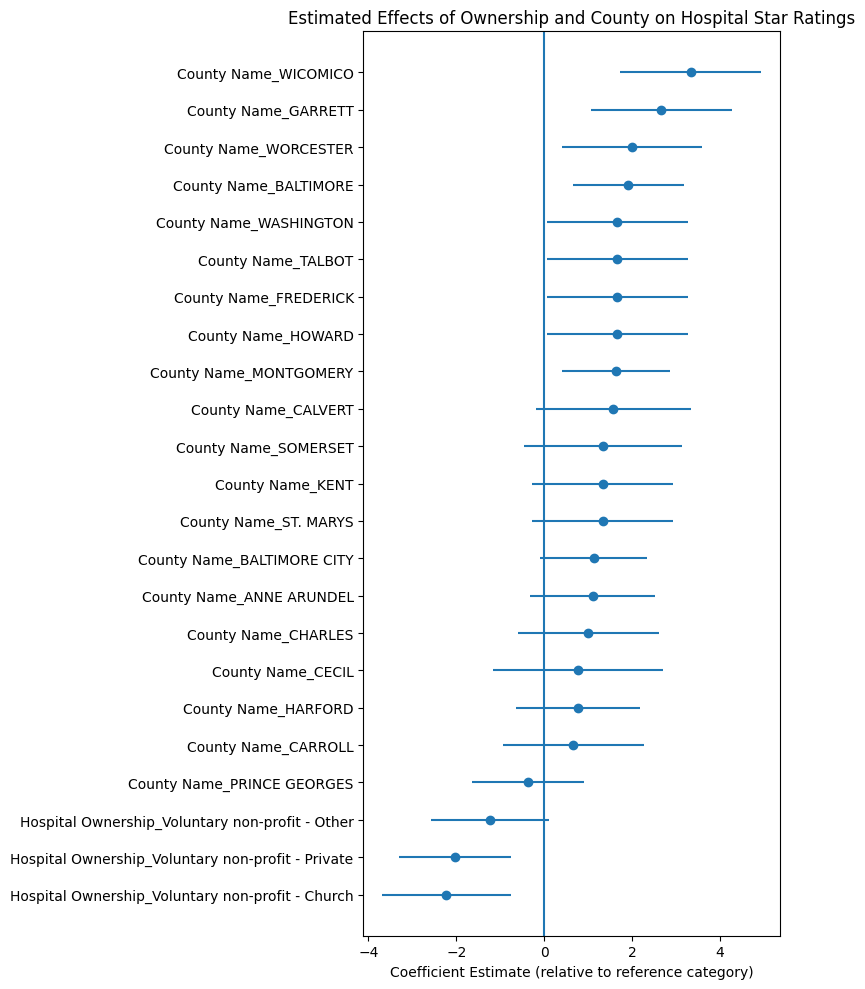

In [25]:
coef_df = pd.DataFrame({
    "Variable": main_model.params.index,
    "Coefficient": main_model.params.values,
    "Lower CI": main_model.conf_int()[0].values,
    "Upper CI": main_model.conf_int()[1].values
})

# only key predictors (drop intercept)
coef_df = coef_df[coef_df["Variable"] != "const"]

#focus on ownership + county only
coef_df = coef_df[
    coef_df["Variable"].str.contains("Hospital Ownership|County Name")
]
coef_df = coef_df.sort_values("Coefficient")

# plotting
plt.figure(figsize=(8, 10))
plt.errorbar(
    coef_df["Coefficient"],
    coef_df["Variable"],
    xerr=[
        coef_df["Coefficient"] - coef_df["Lower CI"],
        coef_df["Upper CI"] - coef_df["Coefficient"]
    ],
    fmt="o"
)

plt.axvline(0)
plt.title("Estimated Effects of Ownership and County on Hospital Star Ratings")
plt.xlabel("Coefficient Estimate (relative to reference category)")
plt.ylabel("")
plt.tight_layout()


plt.show()